In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
font = {
    'weight': 'normal',
    'size': 15
}

matplotlib.rc('font', **font)

In [3]:
dataframe = pd.read_csv('data/data.csv')
dataframe = dataframe[[
    'Age', 'Nationality', 'Club', 'Value', 'Wage', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until',
    'Height', 'Weight',
    
    'Finishing', 'SprintSpeed', 'Stamina', 'BallControl', 'Penalties', 'Aggression', 'StandingTackle', 'SlidingTackle', 
    'Interceptions', 'ShotPower', 'Dribbling', 'ShortPassing', 'LongPassing', 'LongShots'
]]

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   18207 non-null  int64  
 1   Nationality           18207 non-null  object 
 2   Club                  17966 non-null  object 
 3   Value                 18207 non-null  object 
 4   Wage                  18207 non-null  object 
 5   Position              18147 non-null  object 
 6   Joined                16654 non-null  object 
 7   Loaned From           1264 non-null   object 
 8   Contract Valid Until  17918 non-null  object 
 9   Height                18159 non-null  object 
 10  Weight                18159 non-null  object 
 11  Finishing             18159 non-null  float64
 12  SprintSpeed           18159 non-null  float64
 13  Stamina               18159 non-null  float64
 14  BallControl           18159 non-null  float64
 15  Penalties          

In [5]:
dataframe['Height'] = dataframe['Height'].apply(
    lambda x: (int(x.split('\'')[0]) * 12 + int(x.split('\'')[1])) * 2.54 if x is not np.nan else x
)

dataframe['Height'] = dataframe['Height'].fillna(dataframe['Height'].mean())

dataframe['Weight'] = dataframe['Weight'].apply(
    lambda x: int(x[:3]) * 0.453592 if x is not np.nan else x
)

dataframe['Weight'] = dataframe['Weight'].fillna(dataframe['Weight'].mean())

In [6]:
for column in ['Value', 'Wage']:
    dataframe[column] = dataframe[column].apply(
        lambda x: x.split('€')[1]
    )
    dataframe[column] = dataframe[column].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [7]:
dataframe.describe().to_csv()

,Age,Value,Wage,Height,Weight,Finishing,SprintSpeed,Stamina,BallControl,Penalties,Aggression,StandingTackle,SlidingTackle,Interceptions,ShotPower,Dribbling,ShortPassing,LongPassing,LongShots
count,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,2.410696e+06,9731.312133,181.257584,75.286805,45.550911,64.726967,63.219946,58.369459,48.548598,55.868991,47.697836,45.661435,46.698276,55.460047,55.371001,58.686712,52.711933,47.109973
std,4.669943,5.594933e+06,21999.290406,6.721268,7.063686,19.525820,14.649953,15.894741,16.686595,15.704053,17.367967,21.664004,21.289135,20.696909,17.237958,18.910371,14.699495,15.327870,19.260524
min,16.000000,0.000000e+00,0.000000,154.940000,49.895120,2.000000,12.000000,12.000000,5.000000,5.000000,11.000000,2.000000,3.000000,3.000000,2.000000,4.000000,7.000000,9.000000,3.000000
25%,21.000000,3.000000e+05,1000.000000,175.260000,69.853168,30.000000,57.000000,56.000000,54.000000,39.000000,44.000000,27.000000,24.000000,26.000000,45.000000,49.000000,54.000000,43.000000,33.000000
50%,25.000000,6.750000e+05,3000.000000,180.340000,74.842680,49.000000,67.000000,66.000000,63.000000,49.000000,59.000000,55.000000,52.000000,52.000000,59.000000,61.000000,62.000000,56.000000,51.000000
75%,28.000000,2.000000e+06,9000.000000,185.420000,79.832192,62.000000,75.000000,74.000000,69.000000,60.000000,69.000000,66.000000,64.000000,64.000000,68.000000,68.000000,68.000000,64.000000,62.000000
max,45.000000,1.185000e+08,565000.000000,205.740000,110.222856,95.000000,96.000000,96.000000,96.000000,92.000000,95.000000,93.000000,91.000000,92.000000,95.000000,97.000000,93.000000,93.000000,94.000000


In [8]:
columns = [
    'Age', 'Wage', 'Value', 'Height', 'Weight', 'Finishing', 'SprintSpeed', 'Stamina', 'BallControl',
    'Penalties', 'Aggression', 'StandingTackle', 'SlidingTackle', 'Interceptions', 'ShotPower', 'Dribbling',
    'ShortPassing', 'LongPassing', 'LongShots'
]

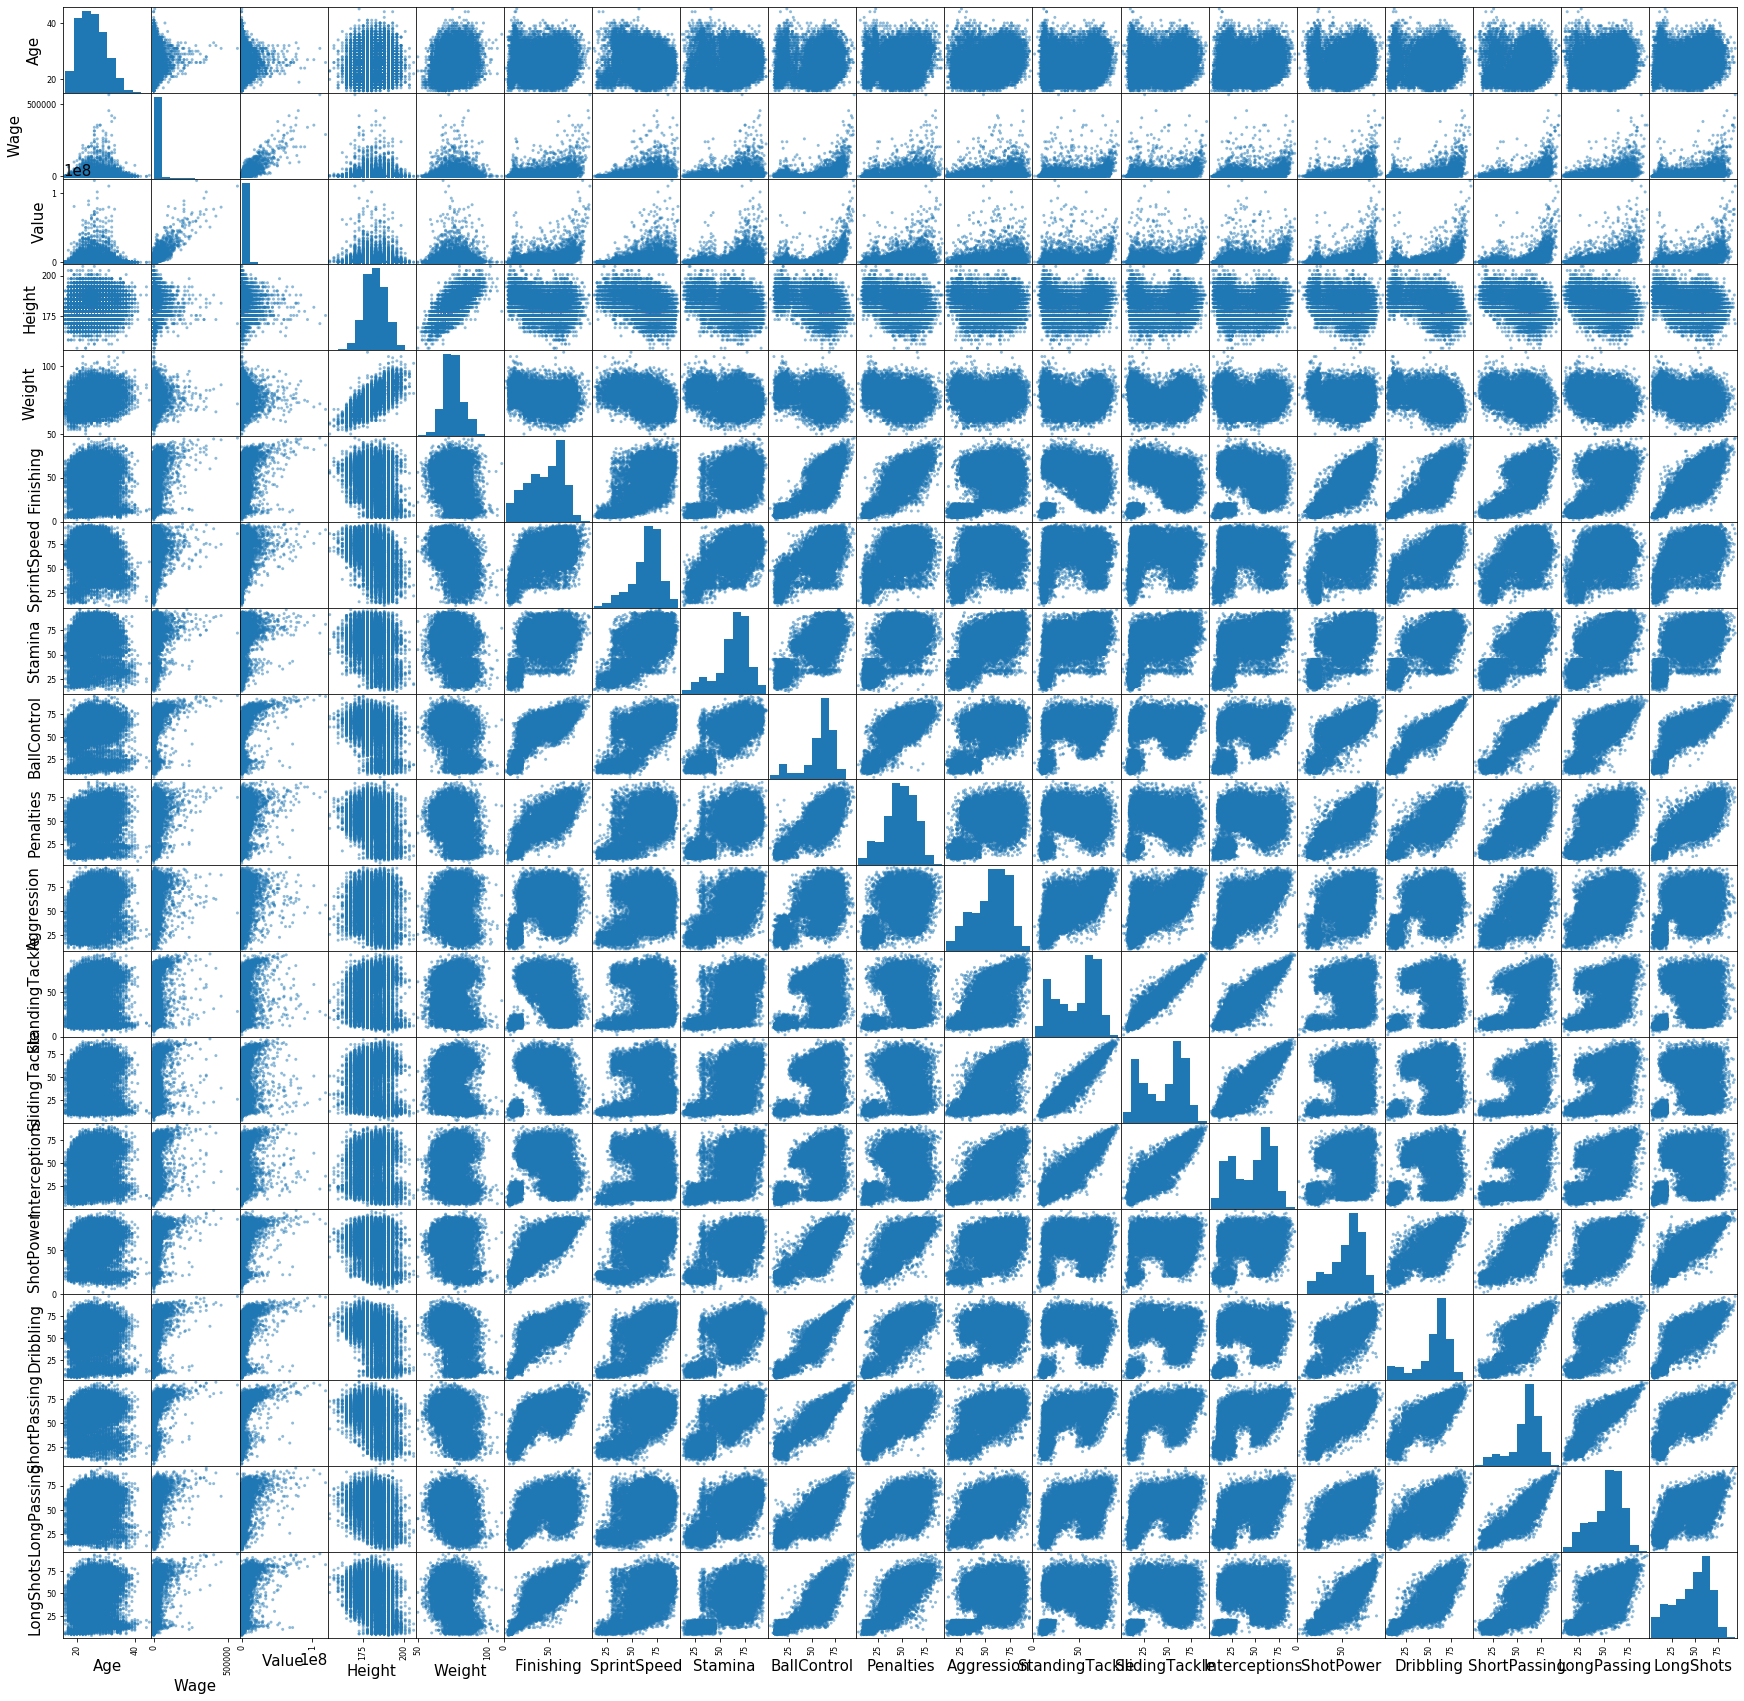

<Figure size 432x288 with 0 Axes>

In [9]:
corr = dataframe[columns]

pd.plotting.scatter_matrix(corr, figsize=(30, 30))
plt.show()
plt.savefig('corr.png')

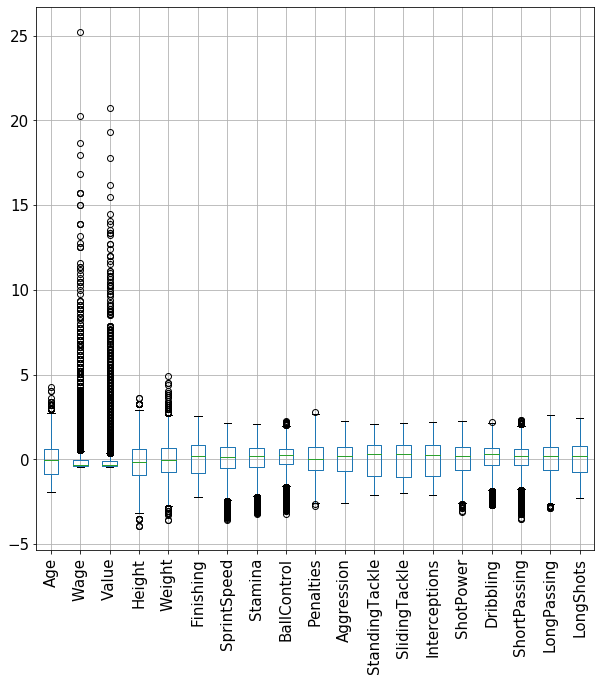

In [10]:
normalized = dataframe[columns]
normalized = preprocessing.scale(normalized)
normalized = pd.DataFrame(normalized, columns=columns)
normalized.boxplot(figsize=(10, 10), rot=90)
plt.savefig('box_with_outliers.png', bbox_inches='tight')

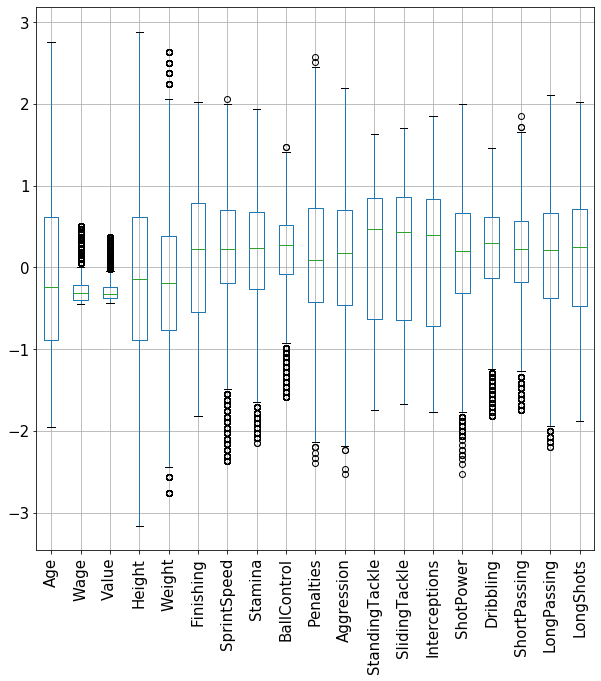

In [11]:
Q1 = normalized.quantile(0.25)
Q3 = normalized.quantile(0.75)
IQR = Q3 - Q1
no_outliers = normalized[~((normalized < (Q1 - 1.5 * IQR)) |(normalized > (Q3 + 1.5 * IQR))).any(axis=1)]
no_outliers.boxplot(figsize=(10, 10), rot=90)
plt.savefig('box_without_outliers.png', bbox_inches='tight')

In [12]:
font = {
    'weight': 'normal',
    'size': 20
}

matplotlib.rc('font', **font)

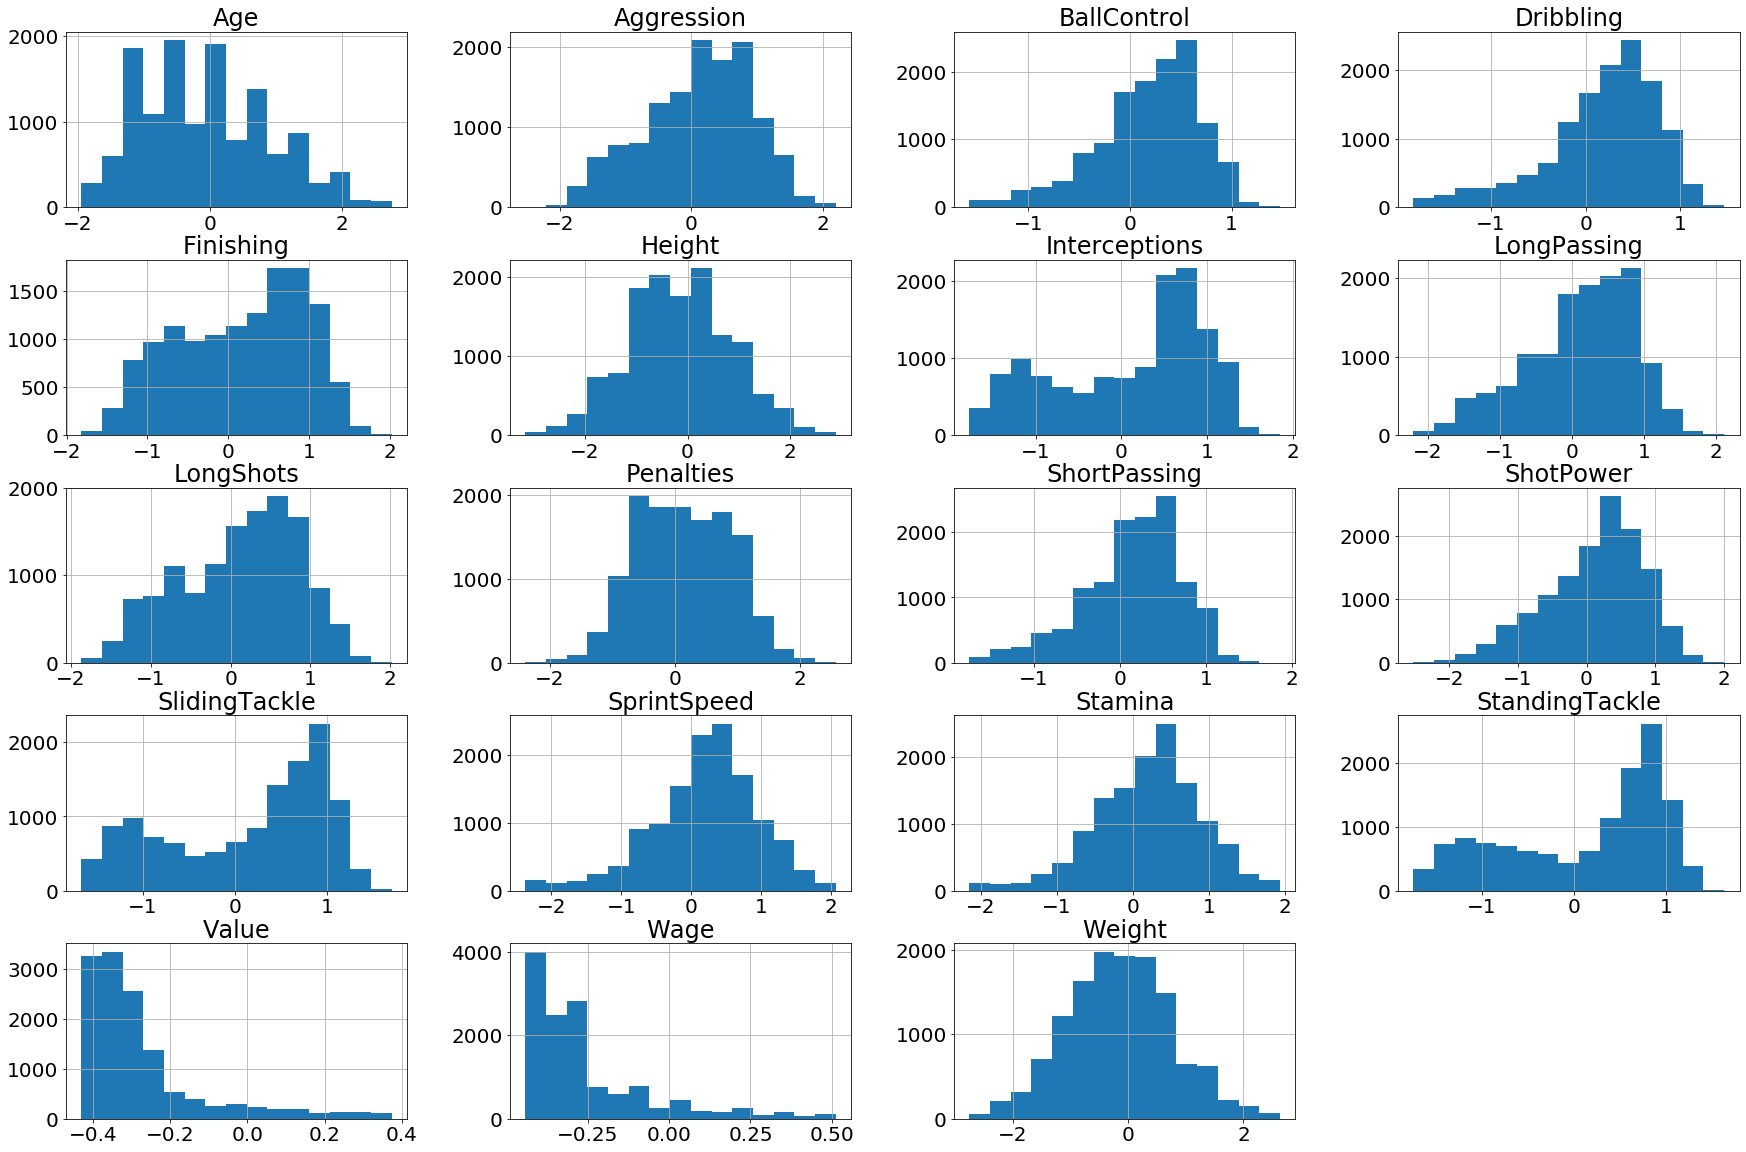

In [13]:
no_outliers.hist(bins=15, figsize=(30, 20))
plt.savefig('hist.png', bbox_inches='tight')
plt.show()

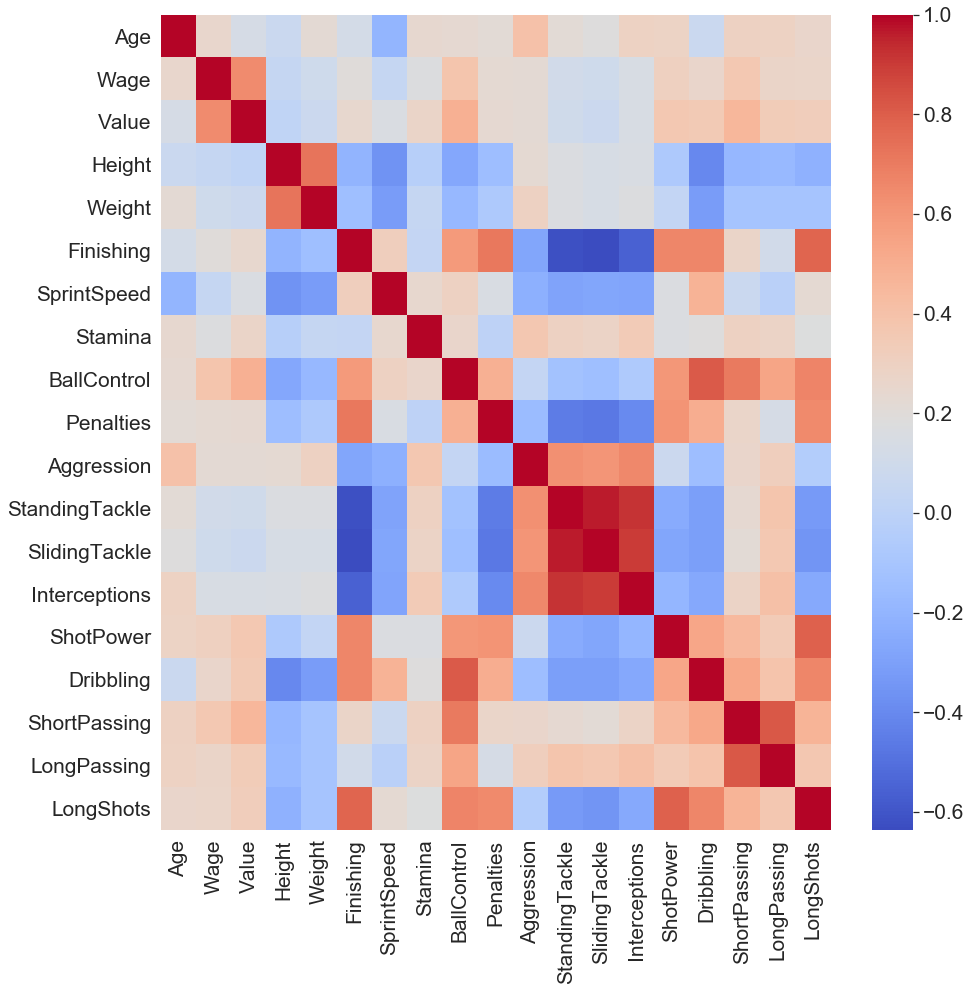

In [14]:
corr = no_outliers.corr()
sns.set(rc={'figure.figsize':(15, 15)}, font_scale=1.9)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.savefig('heatmap.png', bbox_inches='tight')

In [15]:
no_outliers = no_outliers.fillna(no_outliers.mean())

In [16]:
sns.reset_orig()
font = {
    'weight': 'normal',
    'size': 20
}

matplotlib.rc('font', **font)

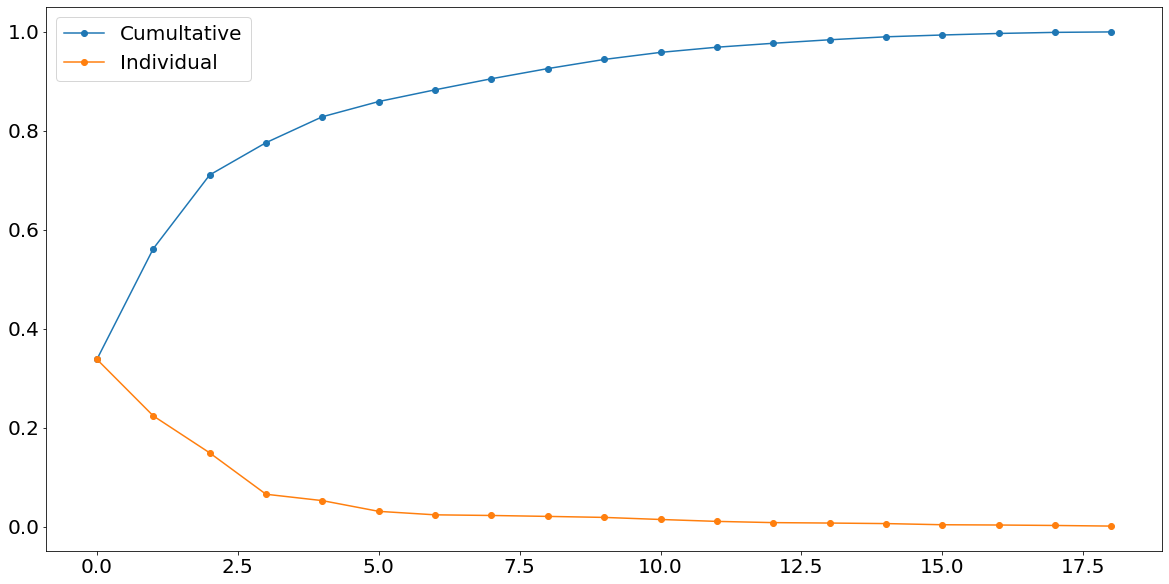

In [17]:
pca = PCA(n_components=19)
pca.fit(no_outliers)
pca.explained_variance_ratio_
figure(figsize=(20, 10))
plt.plot(range(19), np.cumsum(pca.explained_variance_ratio_),'-o', label='Cumultative')
plt.plot(range(19), pca.explained_variance_ratio_,'-o', label='Individual')
plt.legend()
plt.savefig('explained_variance.png', bbox_inches='tight')

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33805988, 0.5617744 , 0.71079439, 0.77609956, 0.82851156,
       0.85924279, 0.88293695, 0.90532794, 0.92585523, 0.94433416,
       0.95862845, 0.9690731 , 0.97701779, 0.98410647, 0.99010438,
       0.9937608 , 0.99687016, 0.99906808, 1.        ])

In [19]:
pca.explained_variance_ratio_

array([0.33805988, 0.22371452, 0.14901999, 0.06530517, 0.052412  ,
       0.03073123, 0.02369416, 0.02239099, 0.02052728, 0.01847893,
       0.01429429, 0.01044464, 0.00794469, 0.00708868, 0.00599791,
       0.00365641, 0.00310936, 0.00219793, 0.00093192])

In [20]:
pca.components_

array([[ 1.01059241e-01,  3.57501451e-04, -3.69855679e-03,
         2.03678787e-01,  1.86843460e-01, -3.34694188e-01,
        -1.85341801e-01,  7.05702302e-02, -1.07461401e-01,
        -2.48296654e-01,  2.74701954e-01,  4.06266735e-01,
         4.07370555e-01,  4.00075437e-01, -1.73404195e-01,
        -1.86296041e-01, -5.44093631e-03,  5.81706192e-02,
        -2.32621953e-01],
       [-4.07921732e-01, -5.28563469e-02, -5.07090116e-02,
         1.09172186e-01,  1.20658509e-02, -2.08302722e-01,
        -4.53398031e-02, -2.22188965e-01, -2.38160681e-01,
        -2.11452206e-01, -2.48500539e-01, -1.58842220e-01,
        -1.43891300e-01, -2.08238513e-01, -3.06121603e-01,
        -2.17699080e-01, -2.92849001e-01, -3.64913212e-01,
        -3.29920354e-01],
       [ 2.64364244e-01,  1.67894836e-02,  6.91626058e-03,
         5.78179549e-01,  5.95114481e-01,  1.37957900e-01,
        -2.12949211e-01, -5.45380743e-02, -3.15788668e-02,
         1.60781050e-01,  7.57478376e-02, -1.53975793e-01,
    